# - KNN on Iris 

Step 1: Define the objective of the Problem Statement : Find flower species                           
Step 2: Data Gathering : Internet                         
Step 3: Data Preparation : Already clean dataset                
Step 4: Exploratory Data Analysis                 
Step 5: Building a Machine Learning Model                        
Step 6: Model Evaluation & Optimization                      
Step 7: Predictions                      


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read csv file of iris dataframe
df=pd.read_csv('iris.csv')

In [3]:
#We use the method head() to display the first 5 columns of the dataframe.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis (EDA)

In [4]:
#find columns of dataframe
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
#Display the data types of each column using the attribute dtype
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
#the method value_counts to count the number of species with unique species values.
#to_frame() to convert it to a dataframe.
df.species.value_counts().to_frame()

,species
virginica,50
setosa,50
versicolor,50


In [7]:
#find the summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
#The describe() function computes a summary of statistics for numeric entries such as count,mean,std,min,etc 
#The column which contain onject dtype then can not be include in it .

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#above four column are numeric they displayed here but fifth column which is 'species' which has dtype object is not displayed
#to include this column write 
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
#find unique species in 'Species' column
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
#groupby() is used to split data into groups
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

### visualizing data using different plots

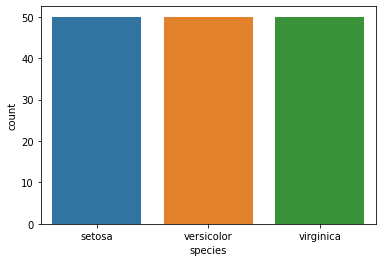

In [12]:
sns.countplot('species',data=df)
#it show the count of each categprical data

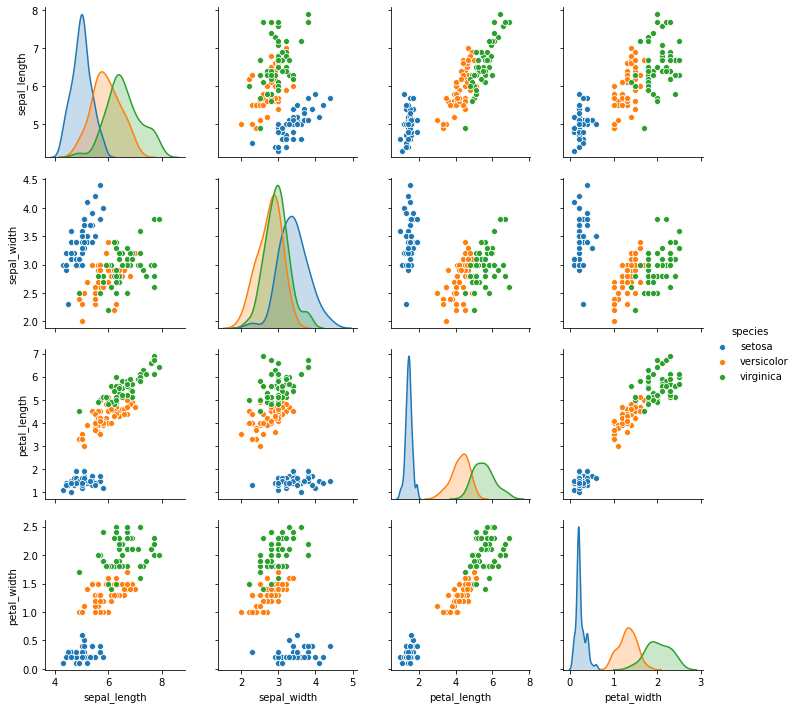

In [13]:
sns.pairplot(df,hue='species')
#A pairplot plot a pairwise relationships with other columns in datafeamw and also plot pairplot with itself .

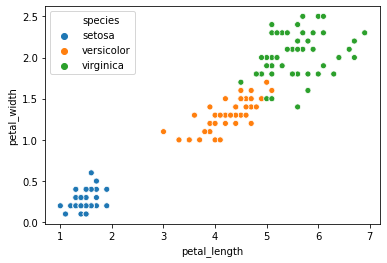

In [14]:
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],hue=df['species'])
#it shows
#if petal_length is less that ~2 and petal_width is less than ~0.6 then species ia 'setosa'
#if petal_length is between ~3 and ~5.2 and petal_width is between ~1.0 and ~1.7 then species ia 'versicolor'
#if petal_length is greater that ~5.2 and petal_width is greater than ~1.7 then species ia 'virginica'

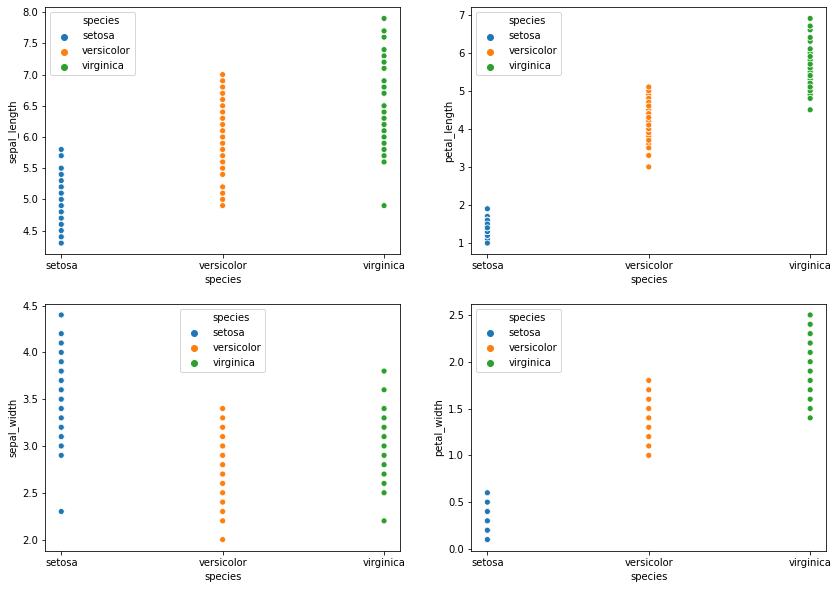

In [15]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.scatterplot(y=df['sepal_length'],x=df['species'],hue=df['species'])
plt.subplot(2,2,2)
sns.scatterplot(y=df['petal_length'],x=df['species'],hue=df['species'])
plt.subplot(2,2,3)
sns.scatterplot(y=df['sepal_width'],x=df['species'],hue=df['species'])
plt.subplot(2,2,4)
sns.scatterplot(y=df['petal_width'],x=df['species'],hue=df['species'])

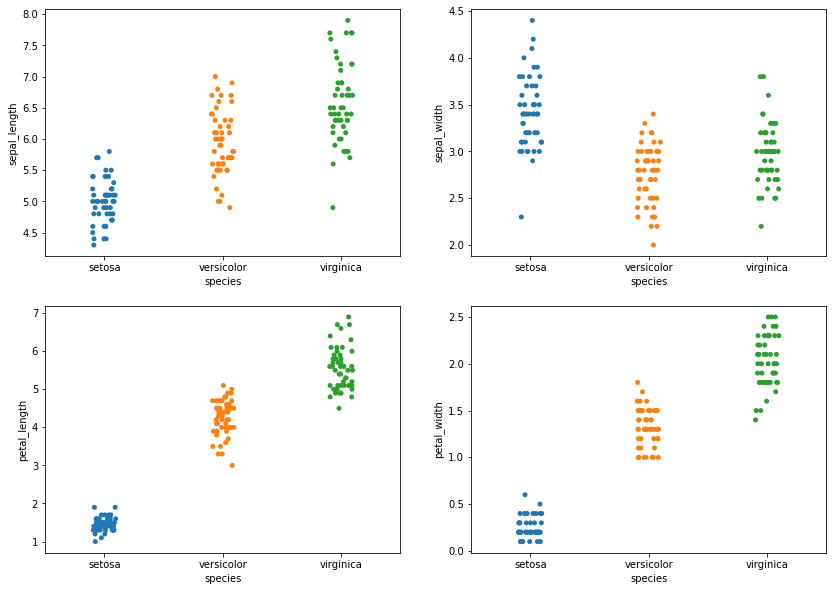

In [16]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.stripplot(x=df['species'],y=df['sepal_length'])
plt.subplot(2,2,2)
sns.stripplot(x=df['species'],y=df['sepal_width'])
plt.subplot(2,2,3)
sns.stripplot(x=df['species'],y=df['petal_length'])
plt.subplot(2,2,4)
sns.stripplot(x=df['species'],y=df['petal_width'])

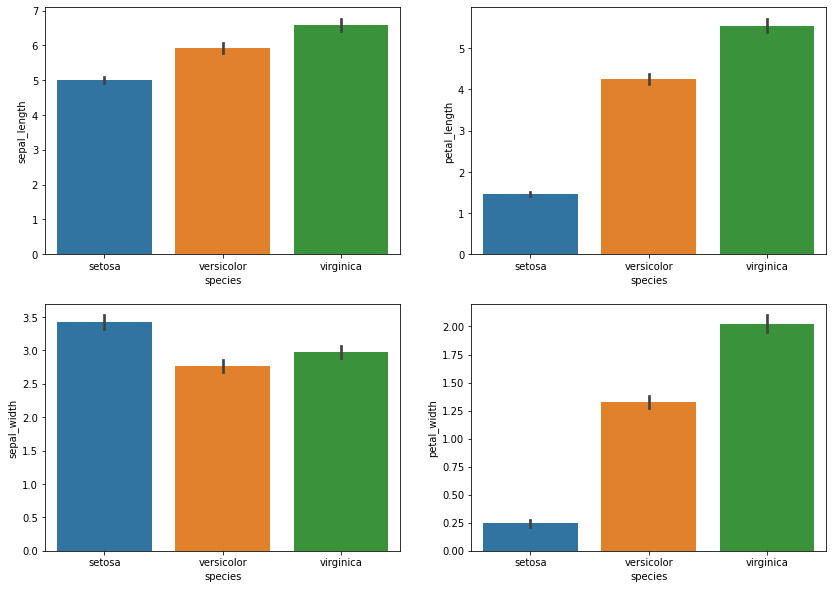

In [17]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.barplot(y=df['sepal_length'],x=df['species'],data=df)
plt.subplot(2,2,2)
sns.barplot(y=df['petal_length'],x=df['species'],data=df)
plt.subplot(2,2,3)
sns.barplot(y=df['sepal_width'],x=df['species'],data=df)
plt.subplot(2,2,4)
sns.barplot(y=df['petal_width'],x=df['species'],data=df)

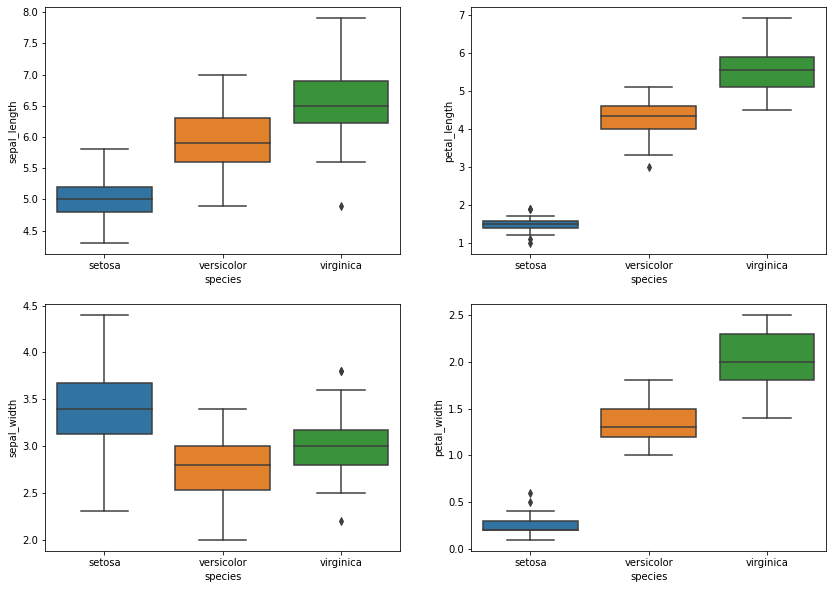

In [18]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(y=df['sepal_length'],x=df['species'],data=df)
plt.subplot(2,2,2)
sns.boxplot(y=df['petal_length'],x=df['species'],data=df)
plt.subplot(2,2,3)
sns.boxplot(y=df['sepal_width'],x=df['species'],data=df)
plt.subplot(2,2,4)
sns.boxplot(y=df['petal_width'],x=df['species'],data=df)

# Building a Machine Learning Model 

In [19]:
# spliting data for Training and Testing where 'x' training data and 'y' is testing data
x =df.iloc[ : , :4]
y =df['species']

In [20]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [22]:
#import required labrary and model in it
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=3)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy=[]
for k in range(1,50,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    accuracy.append(acc)
print(accuracy)
    
    

[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


49


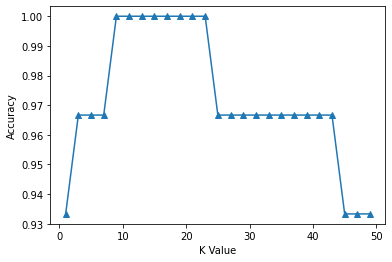

In [25]:
K=[]
for i in range(1,50,2):
    K.append(i)    
plt.plot(K,accuracy,'-^')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print(k)

In [26]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_prd=model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy is : {:.3f}".format(acc*100),"%" )

Accuracy is : 93.333 %


In [27]:
x=model.predict([[1.0,1.9,0.6,1.8]])
print("According to data flower specie is :",x)

According to data flower specie is : ['setosa']


In [29]:
sl=float(input("Enter sepal length : "))
sw=float(input("Enter sepal width : "))
pl=float(input("Enter prtal length : "))
pw=float(input("Enter petal width : "))

x=model.predict([[sl,sw,pl,pw]])
print("According to data flower specie is :",x)

Enter sepal length : 6.5
Enter sepal width : 2.8
Enter prtal length : 5.7
Enter petal width : 0.8
According to data flower specie is : ['virginica']


#  - END